In [1]:
import pandas as pd
from datasets import load_dataset, concatenate_datasets
from matplotlib import pyplot as plt

Reading the raw dataset.

In [2]:
ds = load_dataset(
    "JyotiNayak/political_ideologies",
    revision="f748ec8a7cbbf916453ba489fdc9766b9e4f19c8"
)
df = concatenate_datasets(ds.values()).to_pandas()
df = df.set_index("__index_level_0__").rename_axis(None)
df

README.md:   0%|          | 0.00/5.32k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/553k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2560 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/320 [00:00<?, ? examples/s]

,statement,label,issue_type
465,"Climate change, and the escalating environment...",1,1
1191,I believe in the foundational importance of th...,0,2
2440,I firmly believe that the principle of separat...,1,6
2406,I firmly believe in the separation of church a...,1,6
1903,I firmly believe in the power of free markets ...,0,0
...,...,...,...
2763,It is essential to respect and value the tradi...,0,2
3151,While it is essential to foster a society that...,0,5
3037,"In the context of immigration, it's crucial to...",1,5
1877,While respecting the importance of fiscal resp...,1,0


Dropping useless columns.

In [3]:
df = df.drop(columns=["issue_type"])

Renaming columns.

In [4]:
df = df.rename(columns={"statement": "body", "label": "leaning"})

Categorizing the leaning column.

In [5]:
df["leaning"].unique()

array([1, 0])

In [6]:
df["leaning"] = df["leaning"].replace({0: "right", 1: "left"})
df["leaning"] = df["leaning"].astype("category")

Dropping rows with missing data.

In [7]:
df = df.dropna()

Printing duplicates.

In [8]:
df[df["body"].duplicated(keep=False)]

,body,leaning


Inspecting body length.

In [9]:
df["body_length"] = df["body"].str.len()
df["body_word_count"] = df["body"].str.split().str.len()
df = df.sort_values(by="body_length")
df.head()

,body,leaning,body_length,body_word_count
384,Government intervention in the free market sho...,right,246,36
2242,I firmly believe in the importance of universa...,left,253,43
777,I strongly believe in the importance of indivi...,right,271,40
1631,Access to quality healthcare should be a basic...,left,276,44
311,I strongly believe in the power of free market...,right,279,41


In [10]:
df["body_length"].mean()

np.float64(417.043125)

The leaning distribution.

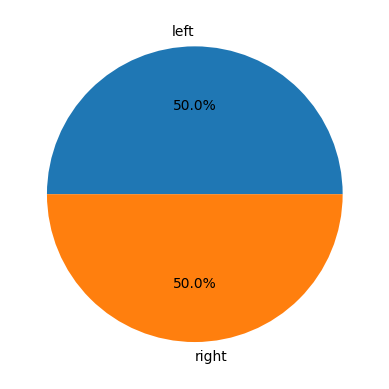

In [11]:
df.groupby("leaning", observed=True).size().plot.pie(autopct="%1.1f%%");

The distribution of body length sums per leaning.

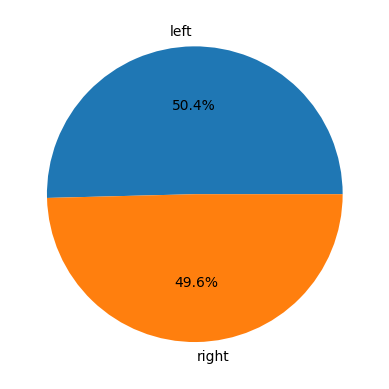

In [12]:
df.groupby("leaning", observed=True)["body_length"].sum().plot.pie(autopct="%1.1f%%", ylabel="");

Body length distribution by leaning.

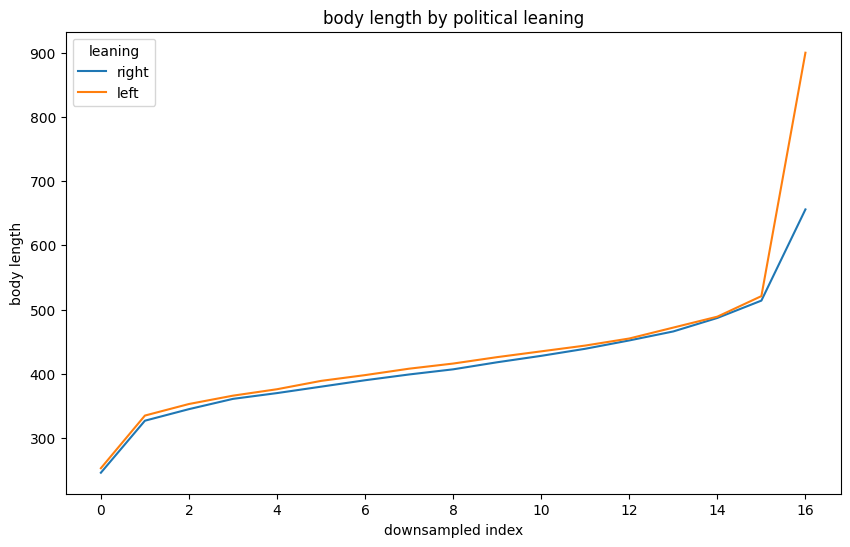

In [13]:
plt.figure(figsize=(10, 6))

for leaning in df["leaning"].unique():
    df_leaning = df[df["leaning"] == leaning]
    downsampled = pd.concat(
        # Ensuring to include the last (longest) item.
        [df_leaning["body_length"].iloc[::100], df_leaning["body_length"].tail(1)]
    ).drop_duplicates().reset_index(drop=True)
    plt.plot(downsampled, label=leaning)

plt.xlabel("downsampled index")
plt.ylabel("body length")
plt.title("body length by political leaning")
plt.legend(title="leaning")
plt.show()

In [14]:
df.to_parquet("../preprocessed/gpt4_political_ideologies.parquet")